# Part 1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

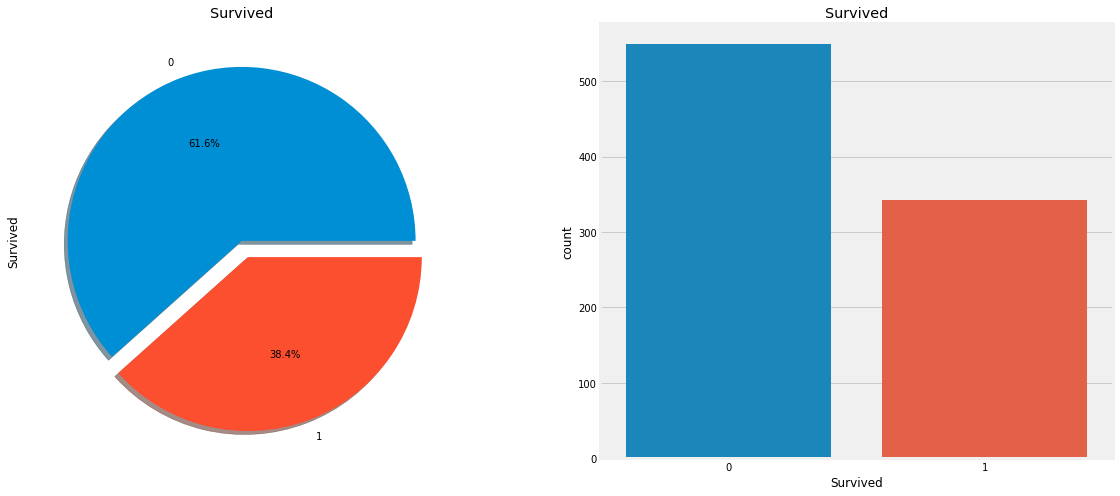

In [5]:
# 얼마나 살아남았나?
f, ax = plt.subplots(1,2,figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('Survived')

sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

## Type of Features

In [6]:
# Sex -->  categorical data
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

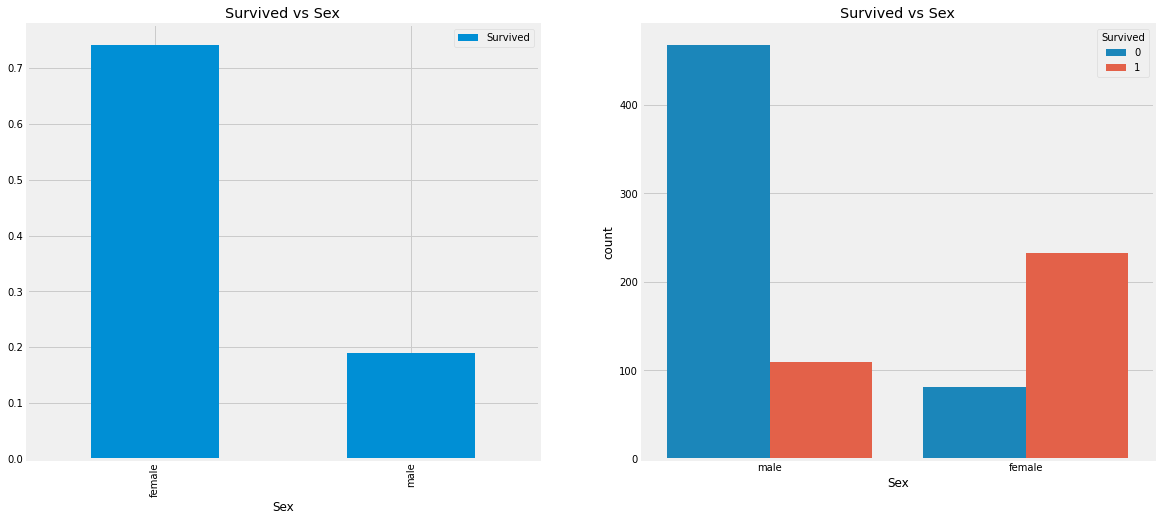

In [7]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Survived vs Sex')
plt.show()

## Pclass --> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


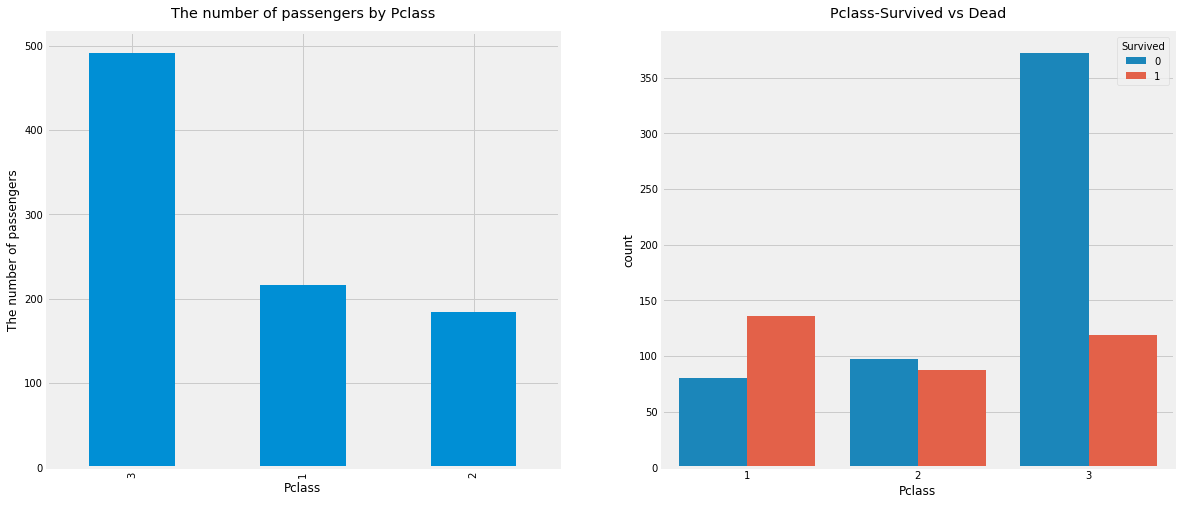

In [9]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data['Pclass'].value_counts().sort_values(ascending = False).plot.bar(ax = ax[0])
ax[0].set_title('The number of passengers by Pclass', y = 1.02)
ax[0].set_ylabel('The number of passengers')
ax[0].set_xlabel('Pclass')

sns.countplot('Pclass', hue='Survived', data=data, ax = ax[1])
ax[1].set_title('Pclass-Survived vs Dead', y = 1.02)
plt.show()

In [10]:
pd.crosstab([data.Sex,data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

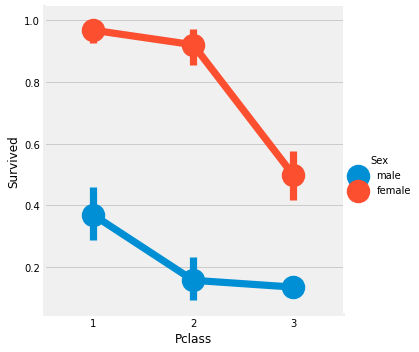

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

**factorplot의 장점**

- 카테고리형 데이터를 보기 쉽게 나누어서 보여줌

## Age --> Continuous Feature

In [12]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship: 29.69911764705882 Years


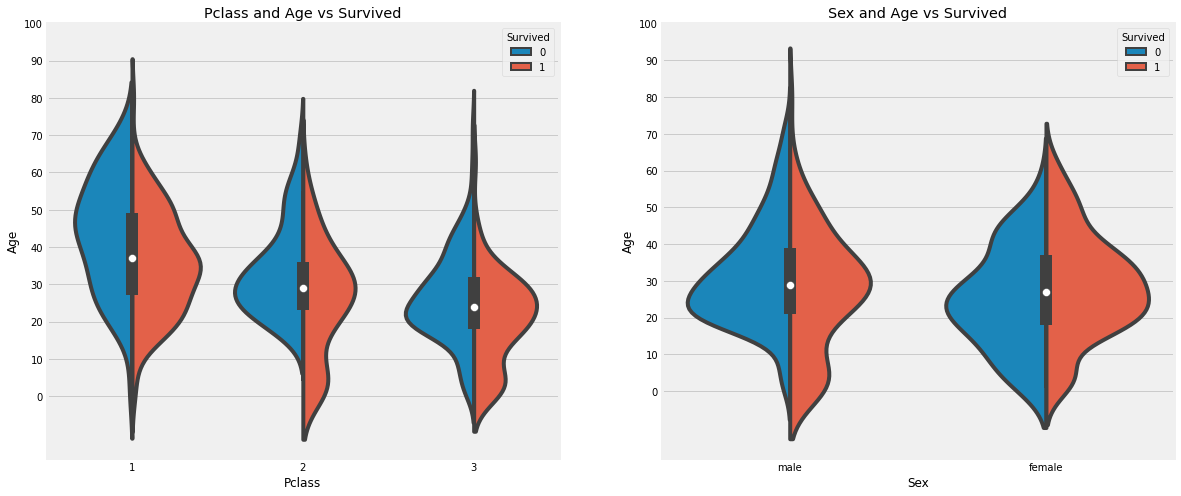

In [13]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=data, ax=ax[0], split = True)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Title

In [14]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.') # .으로 끝나는 단어들 추출하기

    
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

data.groupby('Initial')['Age'].mean() # Initial당 평균 나이

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
# 나이 결측치를 Initial 평균값으로 각각 대체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

# 결측치 처리 확인
data['Age'].isnull().any()

False

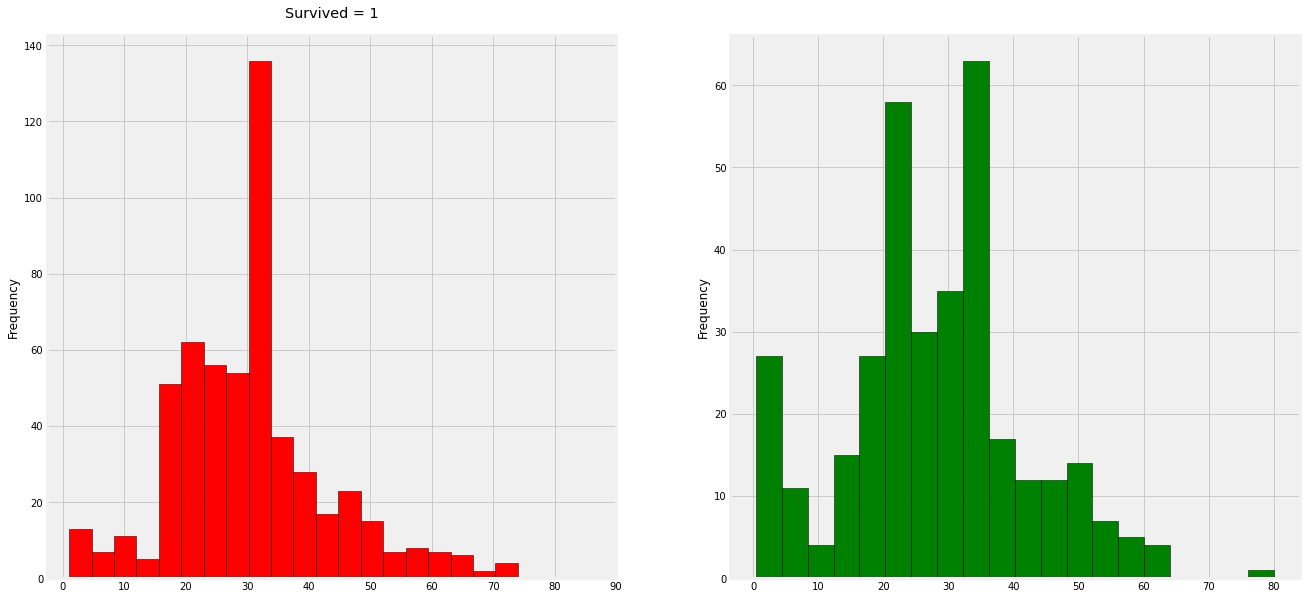

In [18]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived'] == 0]['Age'].plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0', y=1.02)
ax[0].set_xticks(range(0,100,10))

data[data['Survived']==1]['Age'].plot.hist(ax = ax[1], bins = 20, edgecolor='black', color = 'green')
ax[0].set_title('Survived = 1', y=1.02)
ax[0].set_xticks(range(0,100,10))
plt.show()

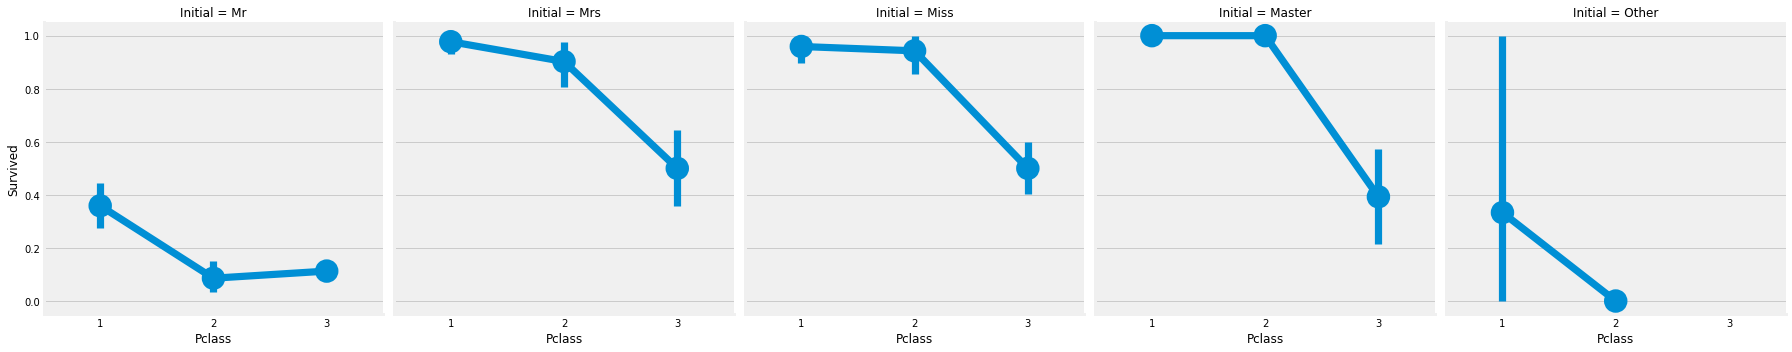

In [19]:
sns.factorplot('Pclass','Survived', col = 'Initial', data= data)
plt.show()

# Embarked --> Categorical Value

In [20]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived], margins = True
           ).style.background_gradient(cmap='summer_r')


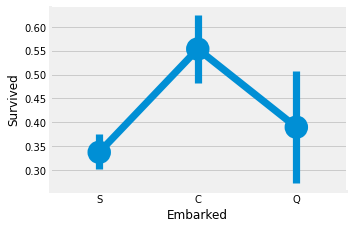

In [21]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf() # 현재 figure 보여주기
fig.set_size_inches(5,3)
plt.show()


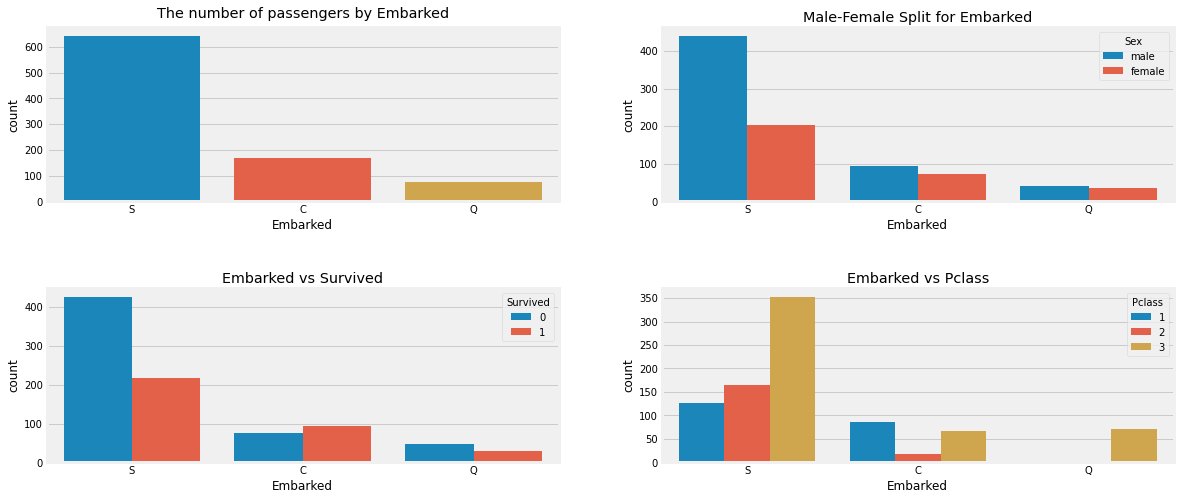

In [22]:
f, ax = plt.subplots(2,2, figsize = (18,8))
sns.countplot('Embarked', data=data, ax = ax[0,0])
ax[0,0].set_title('The number of passengers by Embarked', y = 1.02)

sns.countplot('Embarked', hue = 'Sex', data=data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data=data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data= data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = .5)
plt.show()


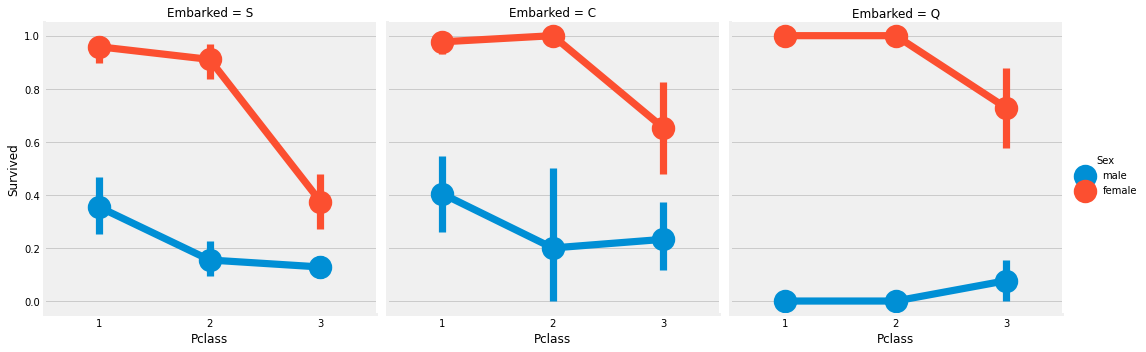

In [23]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data, col = 'Embarked')
plt.show()

In [24]:
# Embarked 결측치 처리
data['Embarked'].fillna('S', inplace = True)

## SibSp --> Discrete Feature

In [25]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


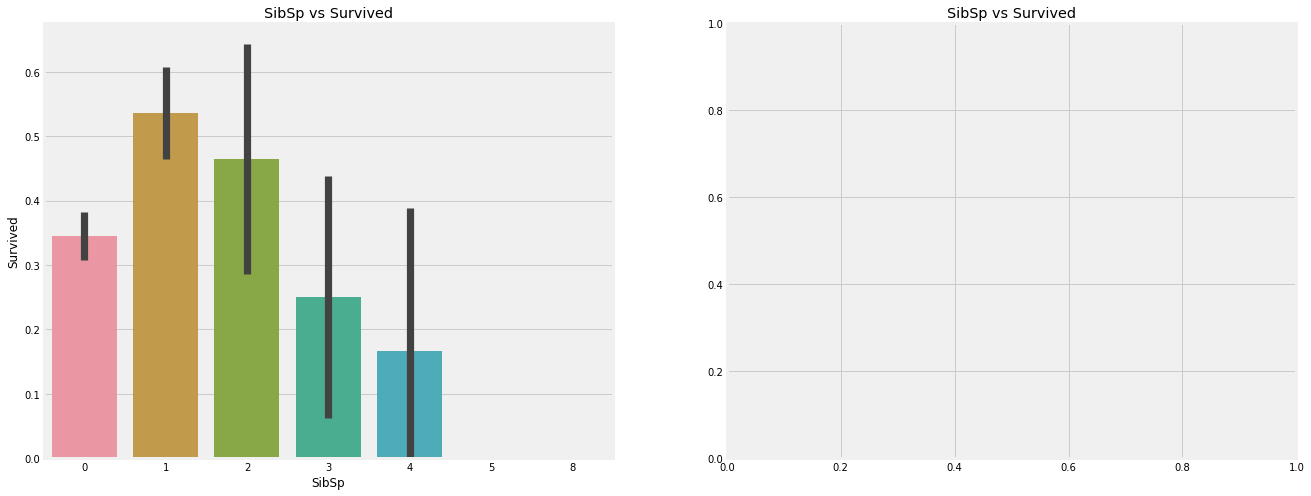

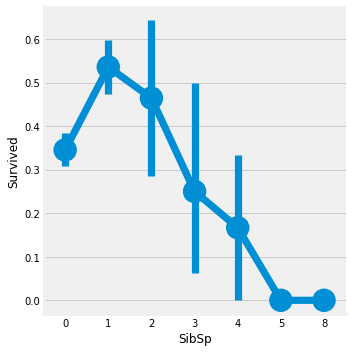

In [26]:
fig, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('SibSp', 'Survived', data=data, ax= ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data= data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [27]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [28]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


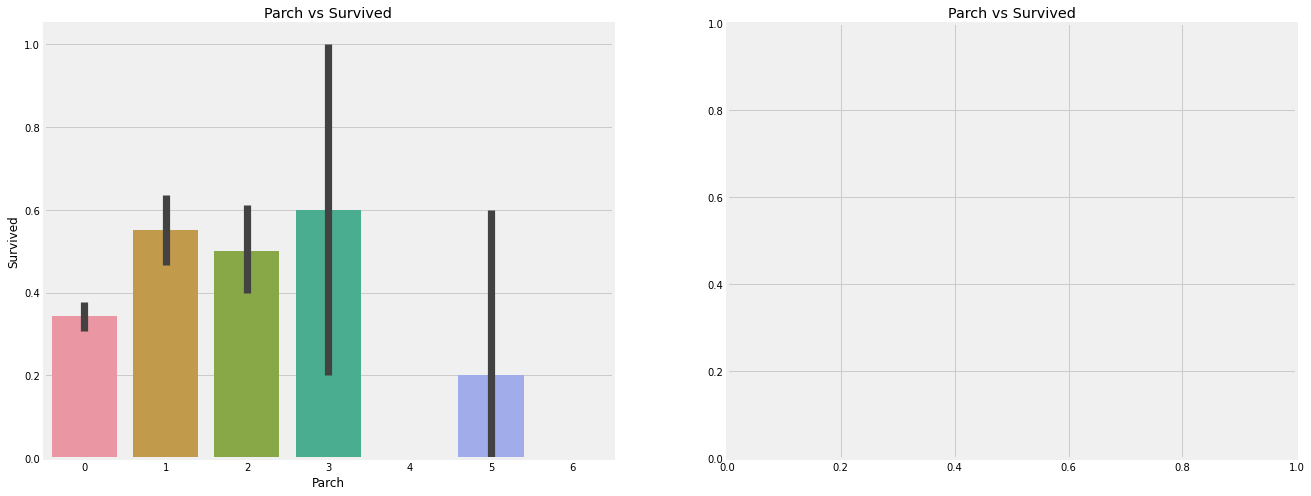

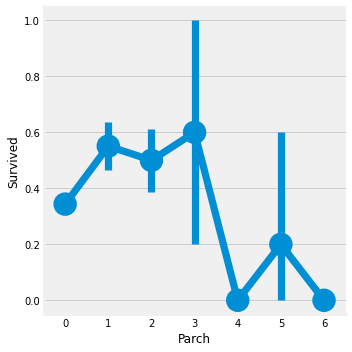

In [29]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('Parch', 'Survived', data=data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data,ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

## Fare --> Continuous Feature

In [30]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


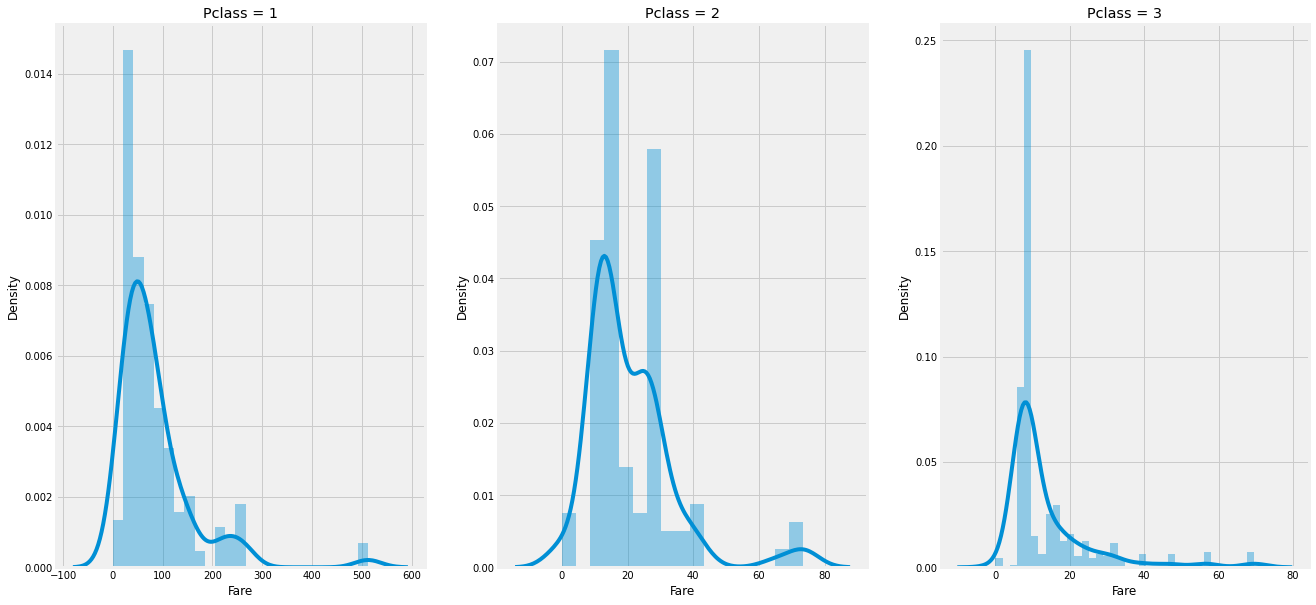

In [31]:
f, ax = plt.subplots(1,3,figsize = (20,10))
sns.distplot(data[data['Pclass']==1]['Fare'], ax = ax[0])
ax[0].set_title('Pclass = 1')

sns.distplot(data[data['Pclass']==2]['Fare'], ax = ax[1])
ax[1].set_title('Pclass = 2')

sns.distplot(data[data['Pclass']==3]['Fare'], ax = ax[2])
ax[2].set_title('Pclass = 3')

plt.show()

## 특성간의 공분산

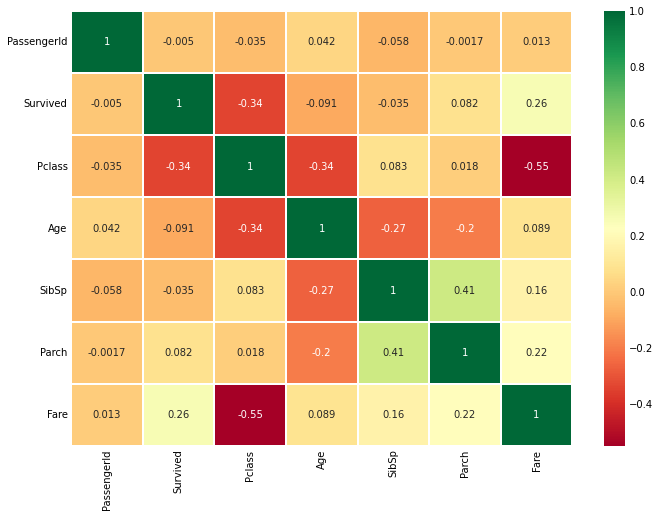

In [32]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Part2: Feature Engineering and Data Cleaning

## Age_band --> 연령대(그룹)

In [33]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


## Family_Size and Alone

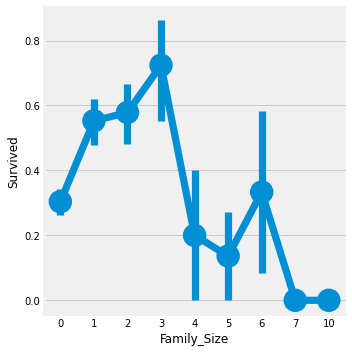

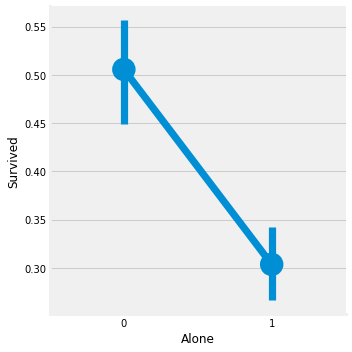

In [34]:
data['Family_Size'] = 0
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data.Family_Size == 0 ,'Alone'] = 1

f, ax = plt.subplots(1,2, figsize = (18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1)
plt.show()

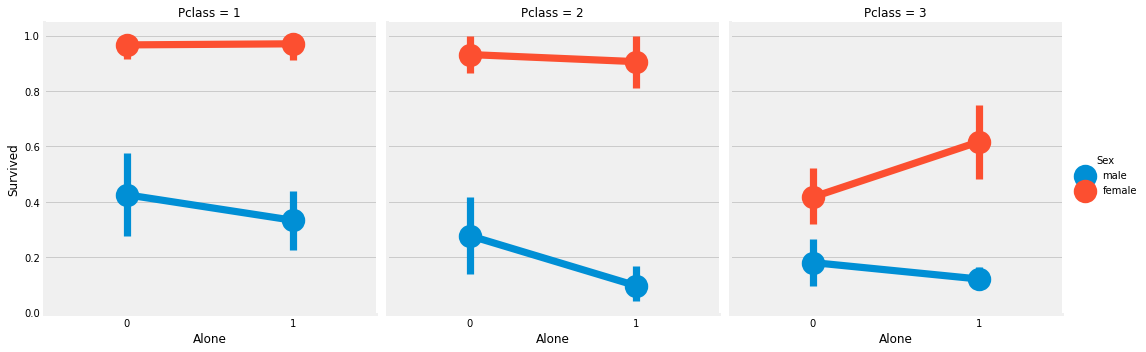

In [35]:
sns.factorplot('Alone', 'Survived', hue='Sex', data = data, col = 'Pclass')
plt.show()


## Fare_Range

In [36]:
data['Fare_Range'] = pd.qcut(data['Fare'],4) # qcut()을 통해 분할
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [37]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

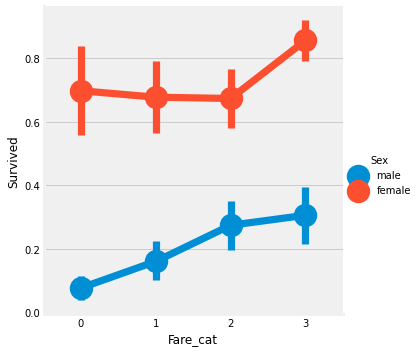

In [38]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue = 'Sex')
plt.show()


In [39]:
# String to Numeric
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace = True)

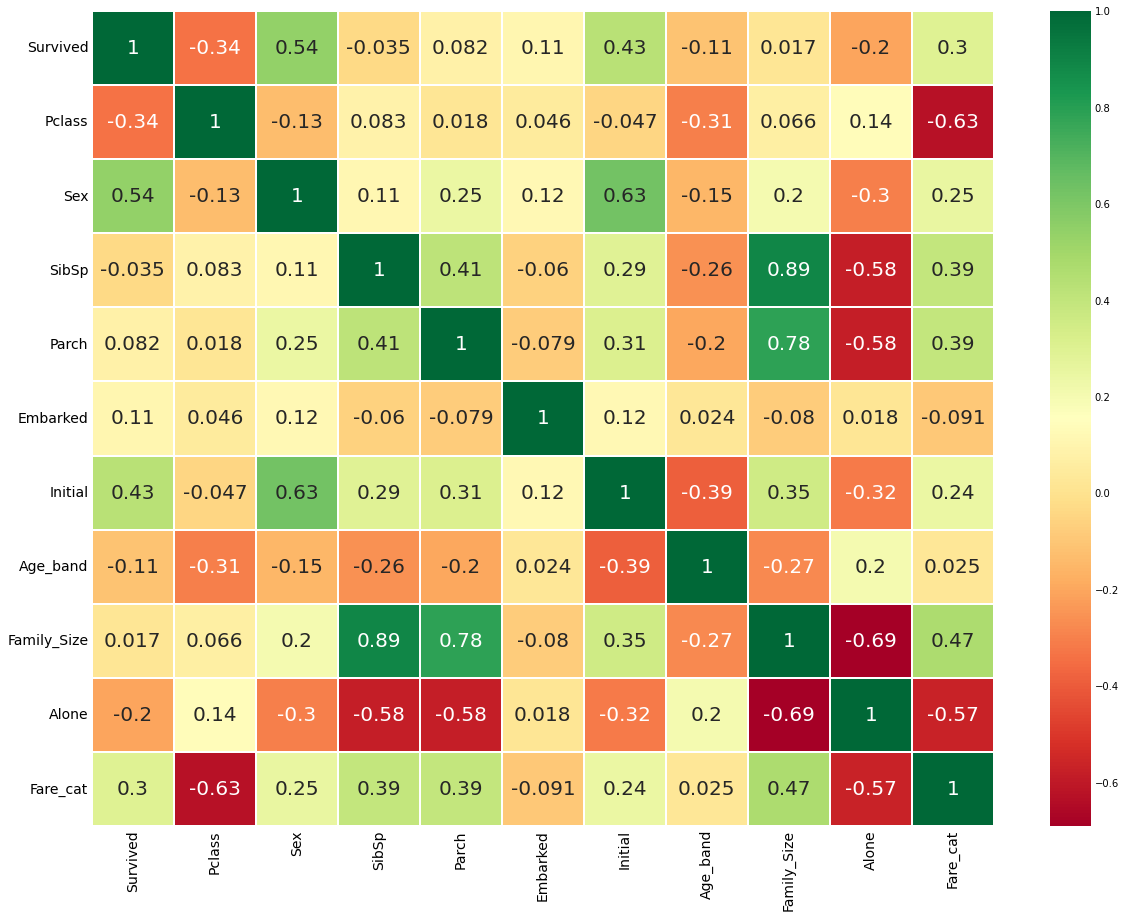

In [40]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis = 1, inplace = True)
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws={'size':20})
fig = plt.gcf() # get currrent figure
fig.set_size_inches(18,15)
plt.xticks(fontsize =14)
plt.yticks(fontsize = 14)
plt.show()

# Part 3: Predictive Modeling

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [42]:
train,test = train_test_split(data,test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [43]:
# SVM (Radial)
model = svm.SVC(kernel = 'rbf', C = 1,gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is {:.2f}%'.format(metrics.accuracy_score(prediction1, test_Y)))

Accuracy for rbf SVM is 0.84%


In [44]:
# SVM (Linear)
model = svm.SVC(kernel = 'linear', C = 0.1, gamma= 0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is {:.2f}%'.format(metrics.accuracy_score(prediction2, test_Y)))

Accuracy for linear SVM is 0.82%


In [45]:
# Logistics
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is {:.2f}%'.format(metrics.accuracy_score(prediction3, test_Y)))

Accuracy for Logistic Regression is 0.81%


In [46]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is {:.2f}%'.format(metrics.accuracy_score(prediction4, test_Y)))

Accuracy for Decision Tree is 0.81%


In [47]:
# KNN
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is {:.2f}%'.format(metrics.accuracy_score(prediction4, test_Y)))

Accuracy for KNN is 0.81%


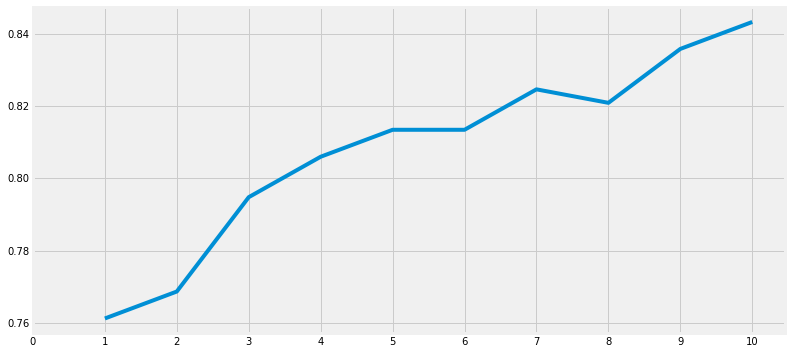

Accucay for different values of n are: [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.8358209  0.84328358] with the max value as  0.8432835820895522


In [48]:
# KNN은 그룹의 갯수를 정해주어야 한다!
a_index= list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accucay for different values of n are:', a.values, 'with the max value as ',a.values.max())

In [49]:
# Gaussian Naive Bayes

model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for Naive Bayes is {:.2f}%'.format(metrics.accuracy_score(prediction6, test_Y)))

Accuracy for Naive Bayes is 0.81%


In [50]:
# Random Forest
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Decision Tree is {:.2f}%'.format(metrics.accuracy_score(prediction7, test_Y)))

Accuracy for Decision Tree is 0.81%


## Cross Validation

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),
        GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X,Y, cv = kfold, scoring = 'accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.812672,0.044030
Decision Tree,0.806991,0.028067
Naive Bayes,0.801386,0.028999
Random Forest,0.806991,0.029812


<AxesSubplot:>

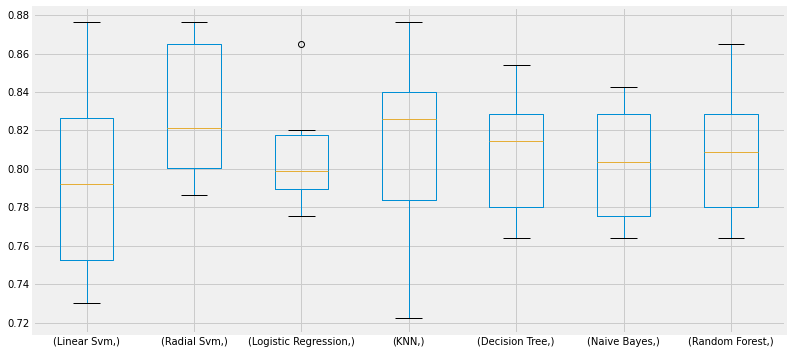

In [52]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

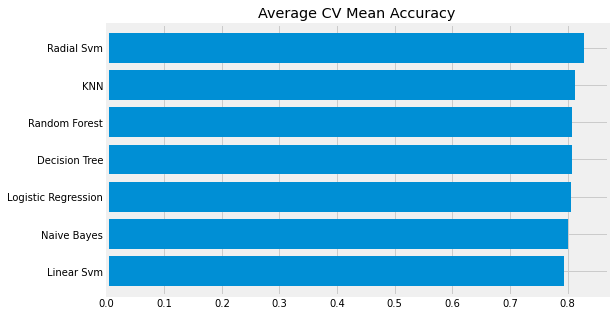

In [53]:
new_models_dataframe2['CV Mean'].sort_values(ascending = True).plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix
분류모델에 따라 정확하게 분류된 경우 또는 오류를 빈도수로 나타낼 수 있다.

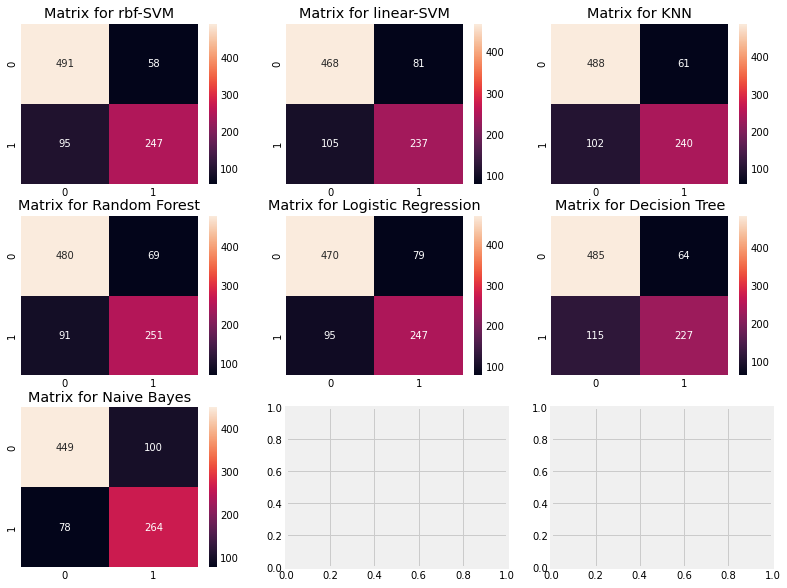

In [54]:
f, ax = plt.subplots(3,3, figsize = (12,10))
y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv = 10) 
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[0,0], annot = True, fmt='2.0f') # fmt='2.0f' = 2.3e+02 -> 230으로 변환
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, Y, cv =10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[0,1], annot = True, fmt='2.0f')
ax[0,1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 9), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,2], annot = True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X, Y, cv =10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[1,0], annot = True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random Forest')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,1], annot = True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,2], annot = True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[2,0], annot = True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.show()

## 하이퍼파라미터 튜닝

In [55]:
# SVM

from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
kernel = ['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [56]:
# Random Forest
n_estimators = range(100,1000,100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


# Ensembling
앙상블 기법은 모델의 정확도나 성능을 높이는 좋은 방법이다. 간단히 말자하면, 다양한 기본모델을 조합하여 하나의 강력한 모델을 만드는 것이다.

앙상블기법은 크게 3가지 방식이 있다.

1) Voting Classifier

2) Bagging

3) Bossting


## Voting Classifier
가장 간단한조합방식은 다양한 많은 기본머신러닝 모델들의 예측값들을 조합하는 것이다. 모든 서브모델들의 예측값의 평균을 구하는 방식으로 쓰인다.

In [57]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)),
                                                 ('RBF', svm.SVC(probability = True, kernel = 'rbf', C = 0.5, gamma = 0.1)),
                                                 ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)),
                                                 ('LR', LogisticRegression(C=0.05)),
                                                 ('DT', DecisionTreeClassifier(random_state = 0)),
                                                 ('NB', GaussianNB()),
                                                 ('svm', svm.SVC(kernel = 'linear', probability = True))],
                                   voting = 'soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X,Y,cv = 10, scoring = 'accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237952559300874


## Bagging
배깅은 가장 일반적인 앙상블 방법이다. 일정부분의 데이터셋을 비슷한 분류모델에 적용하고 모든 예측값들의 평균값을 내는 방식으로 작동이 된다. 평균을 사용하기 때문에, 분산에 감소가 있다. Voting Classifier와는 다르게 Bagging은 비슷한 분류모델을 사용한다.

### Bagged KNN
Bagging 방식은 높은 분산도를 가진 모델에 가장 잘 작동한다. 예시로는 Decision Tree 또는 Random Forest가 있다. KNN을 작은 값의 n_neighbors를 사용할 수 있다.

In [58]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The Accuracy of the Bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Bagged KNN is:', result.mean())

The Accuracy of the Bagged KNN is: 0.832089552238806
The cross validated score for Bagged KNN is: 0.8137952559300874


### Bagged Decision Tree

In [59]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The Accuracy for bagged decision tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged decision Tree is :', result.mean())

The Accuracy for bagged decision tree is: 0.8208955223880597
The cross validated score for bagged decision Tree is : 0.8171410736579275


## Boosting
Boosting은 앙상블 테크닉으로 분류기들의 일련의 학습과정을 사용한다. 약한 모델을 계속해서 상화시키는 방식이다.

모델의 적용방식은 다음과 같다.

첫째로 모든 데이터를 사용하여 모델을 훈련시킨다. 그 이후에 얻은 예측이 맞은것과 맞지 않아 생기는 오류를 토대로 오류가 생기는 데이터에 가중치를 좀 더 두어서 학습을 시켜 고쳐나간다. 이렇게 여러번 반복학습을 통해서 오류를 줄이고 정확도를 높이는 과정을 Boosting 기법이라 한다.


### AdaBoost(Adaptive Boosting)
AdaBoost의 약한 모델은 Decision Tree이다. 하지만, 기본모델에는 어떤 알고리즘을 사용해도 상관이 없다.

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state=0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv =10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Stochastic Gradient Boosting
이 모델 역시 Decision Tree가 약한모델이다.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [62]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y,cv=10, scoring = 'accuracy')
print('The cross validated score for XGBoost is:', result.mean())

[16:15:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:59] WARNING: /Users/runner/miniforge3/cond

### 하이퍼파라미터 튜닝 (AdaBoost)


In [66]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.4,0.5,.6,.7,.8,.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### Confusion Matrix for the Best Model

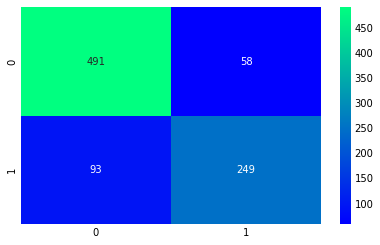

In [68]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0, learning_rate = 0.1)
result = cross_val_predict(ada, X,Y,cv = 10)
sns.heatmap(confusion_matrix(Y, result), cmap = 'winter', annot = True, fmt ='2.0f')
plt.show()

## Feature Importance

[16:48:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


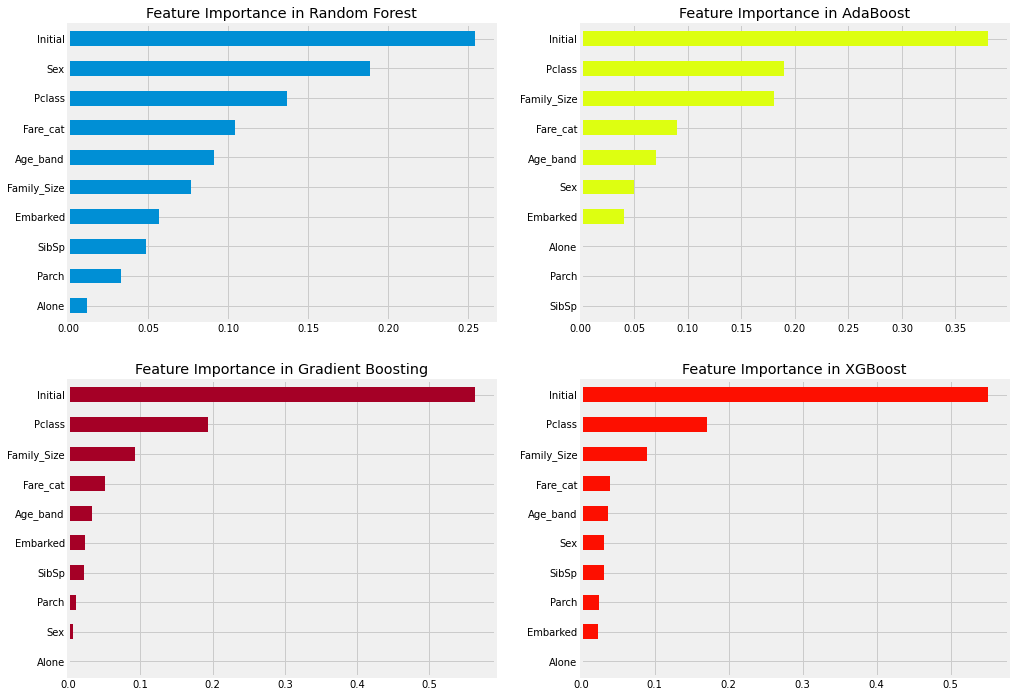

In [75]:
f, ax = plt.subplots(2,2, figsize = (15,12))
model = RandomForestClassifier(n_estimators = 500, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(ax = ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')

model = AdaBoostClassifier(n_estimators  = 100, learning_rate = 0.1, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(ax = ax[0,1], color = '#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(ax = ax[1,0], cmap = 'RdYlGn')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(ax = ax[1,1], color = '#FD0F00')
ax[1,1].set_title('Feature Importance in XGBoost')
plt.show()